<a href="https://colab.research.google.com/github/clementbowe14/ml-class/blob/main/projects/ImageClassification/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification


For this assignment I will be predicting the classes of different images.

The dataset that will be used for this task comes from CIFAR-10.

First lets load the dataset.


In [1]:
from keras.datasets import cifar10

final_scores = {}
(train_X, train_y), (test_X, test_y) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


Before we start working creating a deep learning model for this there are a few things to do. The features are a matrix of values between 0-255. The values in the matrices  0 to 1 because machine learning models have better performance when the data has a lower variability. Also, the numpy arrays will be reshaped  to 50000, 32, 32, 3.

For our labels we are going to categorically encode them so our model encodes each one of the label classes. 

In [2]:
from keras.utils import to_categorical

train_X = (train_X.reshape(50000, 32, 32, 3).astype('float32'))/255
test_X = (test_X.reshape(10000, 32, 32, 3).astype('float32'))/255

train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

Let now create our first model. The model will contain:
- A flatten layer with input shape (32, 32, 3)
- A dense layer with input size 256, an relu activation function and input shape (32, 32, 3)
- A dense layer with input size 64 and activation function relu
- and a Dense layer with output size 10 and the softmax activation function. 

After we create the model we compile it using categorical crossentropy as the loss function, rmsprop as the optimizer and accuracy as the metrics. 

In [3]:
from keras import models, layers, optimizers

network = models.Sequential()
network.add(layers.Flatten(input_shape=(32, 32, 3)))
network.add(layers.Dense(256, activation='relu', input_shape=(32,32,3)))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(10, activation="softmax"))

network.compile(loss='categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])

Train the model the using the training features and the test labels for 50 epochs.

In [4]:
history = network.fit(train_X, train_y, epochs=50,  validation_split=0.2, validation_steps=10)

Epoch 1/50
1250/1250 [==============================] - 9s 3ms/step - loss: 1.9854 - accuracy: 0.2857 - val_loss: 1.8172 - val_accuracy: 0.3391
Epoch 2/50
1250/1250 [==============================] - 3s 2ms/step - loss: 1.7583 - accuracy: 0.3687 - val_loss: 1.7655 - val_accuracy: 0.3793
Epoch 3/50
1250/1250 [==============================] - 3s 3ms/step - loss: 1.6781 - accuracy: 0.3982 - val_loss: 1.6748 - val_accuracy: 0.4007
Epoch 4/50
1250/1250 [==============================] - 3s 2ms/step - loss: 1.6254 - accuracy: 0.4207 - val_loss: 1.7208 - val_accuracy: 0.3874
Epoch 5/50
1250/1250 [==============================] - 3s 2ms/step - loss: 1.5910 - accuracy: 0.4348 - val_loss: 1.6938 - val_accuracy: 0.3957
Epoch 6/50
1250/1250 [==============================] - 3s 3ms/step - loss: 1.5612 - accuracy: 0.4419 - val_loss: 1.5817 - val_accuracy: 0.4389
Epoch 7/50
1250/1250 [==============================] - 3s 3ms/step - loss: 1.5459 - accuracy: 0.4509 - val_loss: 1.6117 - val_accuracy:

Let's plot the training and validation accuracy and loss.

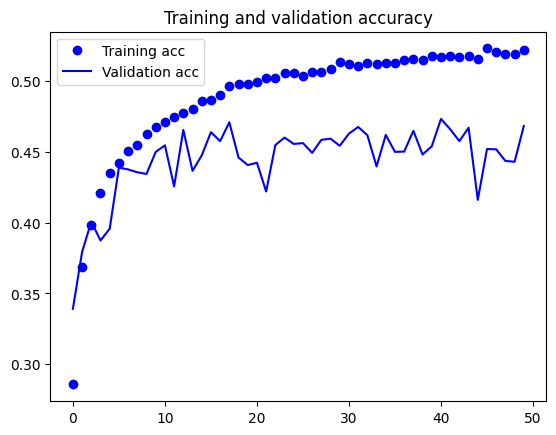

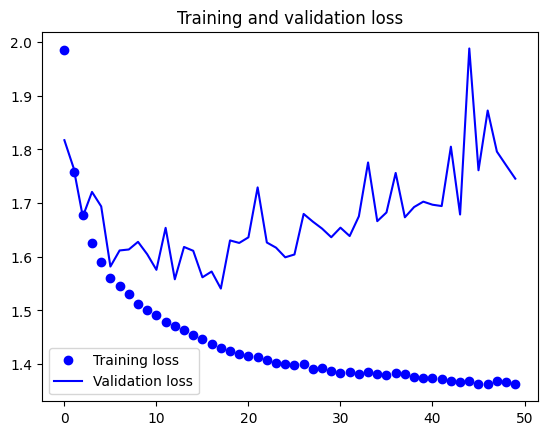

In [5]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Test the network on the test data.

In [6]:
test_loss, test_acc = network.evaluate(test_X, test_y)
final_scores['Simple Neural Network'] = test_acc

313/313 [==============================] - 1s 2ms/step - loss: 1.6632 - accuracy: 0.4642


The next model will utilize convolutional networks to improve the performance. This will model use:
 - a Conv2d layer with a 128 unit size, a (3,3) kernel window and a relu activation function.
 - a MaxPooling2D layer with pool size (2,2)
 - a Conv2d with a 64 unit size, a (3,3) kernel window, and a relu activation function
 - a flatten layer
 -a Dense layer with a 64 unit size and a relu activation function.
 - output layer using activation softmax

 The model will be compiled using the same parameters as the first model.
- optimizer: rmsprop
- metrics: accuracy
- loss: categorical crossentropy

In [7]:

network = models.Sequential()

network.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(32,32,3)))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(64, (3,3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Flatten())
network.add(layers.Dense(64, activation="relu"))
network.add(layers.Dense(10, activation='softmax'))


In [8]:
network.compile(optimizer='rmsprop',
                metrics=['accuracy'],
                loss='categorical_crossentropy')

In [9]:
history = network.fit(train_X, train_y, epochs=50,  validation_split=0.2, validation_steps=10)

Epoch 1/50
1250/1250 [==============================] - 11s 4ms/step - loss: 1.5269 - accuracy: 0.4539 - val_loss: 1.2134 - val_accuracy: 0.5718
Epoch 2/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1207 - accuracy: 0.6083 - val_loss: 1.1048 - val_accuracy: 0.6094
Epoch 3/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.9661 - accuracy: 0.6650 - val_loss: 1.0033 - val_accuracy: 0.6526
Epoch 4/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.8592 - accuracy: 0.7001 - val_loss: 0.9243 - val_accuracy: 0.6875
Epoch 5/50
1250/1250 [==============================] - 4s 4ms/step - loss: 0.7745 - accuracy: 0.7305 - val_loss: 0.9884 - val_accuracy: 0.6711
Epoch 6/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.7006 - accuracy: 0.7613 - val_loss: 0.9690 - val_accuracy: 0.6780
Epoch 7/50
1250/1250 [==============================] - 4s 4ms/step - loss: 0.6347 - accuracy: 0.7823 - val_loss: 0.9380 - val_accuracy

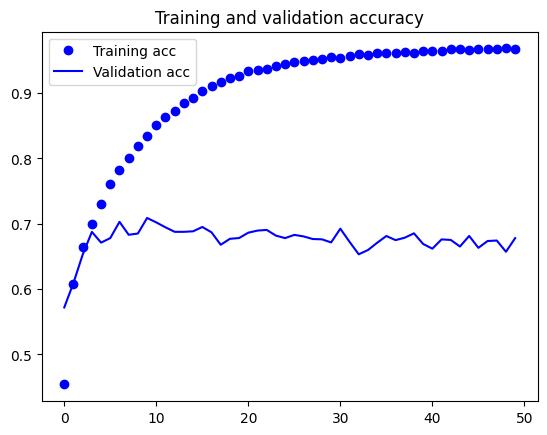

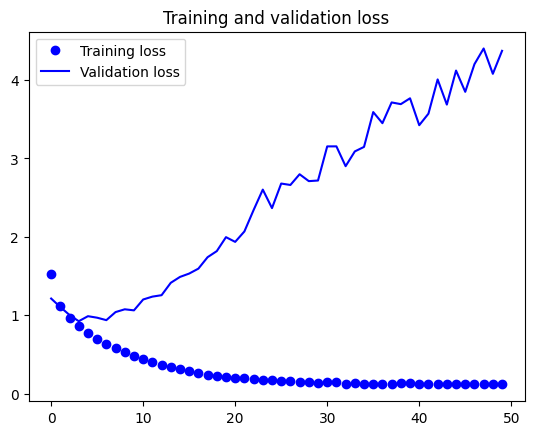

In [10]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
test_loss, test_acc = network.evaluate(test_X, test_y)
final_scores['CNN with Max pooling 1'] = test_acc

313/313 [==============================] - 1s 3ms/step - loss: 4.4512 - accuracy: 0.6748


The next model is constructed using:
- A Conv2D layer with a 32 input size and (3,3) kernel size
- A MaxPooling2D with a (2,2) pool size
- A Conv2d layer with 128 input size and (3,3) kernel size
- A MaxPooling2D layer with a (2,2) pool size
- A Flatten layer
- A Dropout layer with a .5 unit drop rate
- A dense layer with 512 input size and relu activation function
-  An output layer with 10 input size and softmax activation function

The model is compiled with a rmsprop optimizer,categorical crossentropy loss function, and accuracy for metrics. 

In [12]:

network = models.Sequential()
network.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
network.add(layers.MaxPooling2D(2,2))
network.add(layers.Conv2D(128, (3,3)))
network.add(layers.MaxPooling2D(2,2))
network.add(layers.Conv2D(128, (3,3), activation='relu'))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Flatten())
network.add(layers.Dropout(0.5))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

In [13]:
network.compile(optimizer='rmsprop',
                metrics=['accuracy'],
                loss='categorical_crossentropy')

In [14]:
history = network.fit(train_X, train_y, epochs=30, validation_split=0.2, validation_steps=10)

Epoch 1/30
1250/1250 [==============================] - 7s 4ms/step - loss: 1.5920 - accuracy: 0.4250 - val_loss: 1.3087 - val_accuracy: 0.5391
Epoch 2/30
1250/1250 [==============================] - 4s 4ms/step - loss: 1.2993 - accuracy: 0.5396 - val_loss: 1.1225 - val_accuracy: 0.6090
Epoch 3/30
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1865 - accuracy: 0.5870 - val_loss: 1.0582 - val_accuracy: 0.6310
Epoch 4/30
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1205 - accuracy: 0.6138 - val_loss: 0.9956 - val_accuracy: 0.6497
Epoch 5/30
1250/1250 [==============================] - 4s 4ms/step - loss: 1.0849 - accuracy: 0.6296 - val_loss: 0.9909 - val_accuracy: 0.6642
Epoch 6/30
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0521 - accuracy: 0.6429 - val_loss: 0.9604 - val_accuracy: 0.6786
Epoch 7/30
1250/1250 [==============================] - 4s 3ms/step - loss: 1.0283 - accuracy: 0.6517 - val_loss: 0.9346 - val_accuracy:

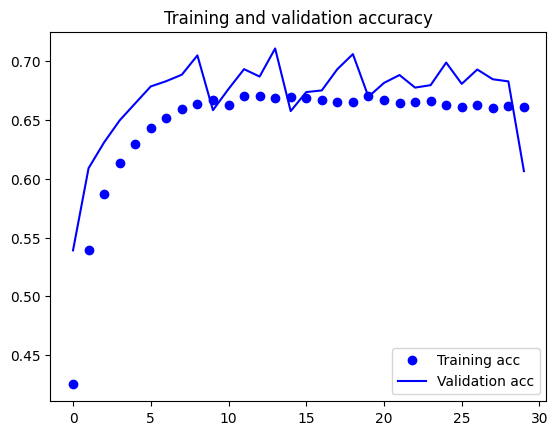

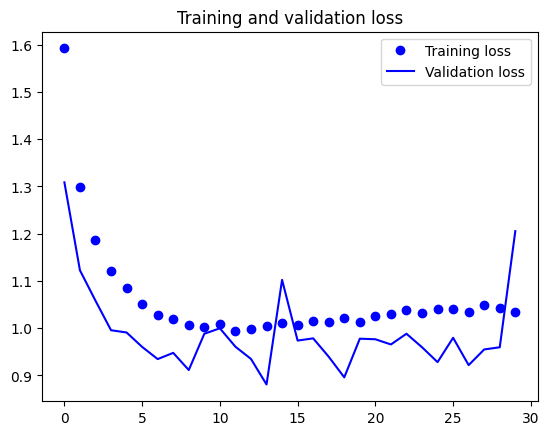

In [15]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
test_loss, test_acc = network.evaluate(test_X, test_y)


313/313 [==============================] - 1s 3ms/step - loss: 1.2116 - accuracy: 0.6071


The next model is built using

- VGG16 with input shape (32, 32,3), using imagenet as the weights, and include top set to false.
- A flatten layer
- an output layer with 10 input size and a softmax activation function.

 To prevent the retraining of those layers each layer has its trainable field set to false. The next layer flattens the output from the VGG16 and the output layer

 The model is compiled using adam as the optimizer, categorical crossentropy as the loss function and accuracy as the metric.


In [17]:
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(input_shape=[32, 32, 3], weights='imagenet', include_top=False)

for layer in vgg_model.layers:
  layer.trainable = False

  flattened_layer = layers.Flatten()(vgg_model.output)
  
  output_layer = layers.Dense(10, activation='softmax')(flattened_layer)

  network = models.Model(inputs=vgg_model.input, outputs=output_layer)

58889256/58889256 [==============================] - 2s 0us/step


In [18]:
network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
history = network.fit(train_X, train_y, epochs=30, steps_per_epoch=len(train_X)/10, validation_split=0.2, validation_steps=10)

Epoch 1/30
5000/5000 [==============================] - 33s 6ms/step - loss: 1.4640 - accuracy: 0.4981 - val_loss: 1.3240 - val_accuracy: 0.5453
Epoch 2/30
5000/5000 [==============================] - 27s 5ms/step - loss: 1.2672 - accuracy: 0.5659 - val_loss: 1.2485 - val_accuracy: 0.5735
Epoch 3/30
5000/5000 [==============================] - 27s 5ms/step - loss: 1.2163 - accuracy: 0.5823 - val_loss: 1.2302 - val_accuracy: 0.5738
Epoch 4/30
5000/5000 [==============================] - 28s 5ms/step - loss: 1.1874 - accuracy: 0.5881 - val_loss: 1.2105 - val_accuracy: 0.5837
Epoch 5/30
5000/5000 [==============================] - 28s 6ms/step - loss: 1.1692 - accuracy: 0.5950 - val_loss: 1.2079 - val_accuracy: 0.5845
Epoch 6/30
5000/5000 [==============================] - 28s 6ms/step - loss: 1.1568 - accuracy: 0.6019 - val_loss: 1.1997 - val_accuracy: 0.5857
Epoch 7/30
5000/5000 [==============================] - 28s 6ms/step - loss: 1.1471 - accuracy: 0.6047 - val_loss: 1.2151 - val_ac

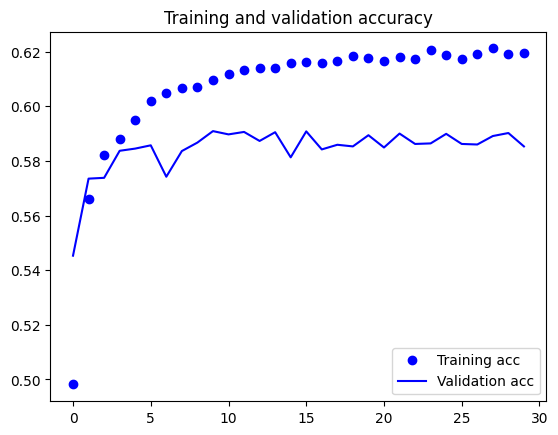

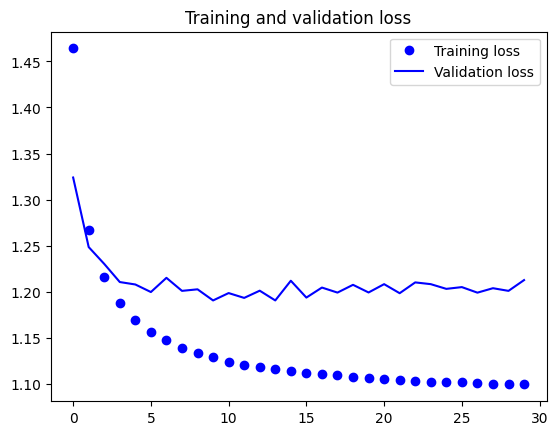

In [20]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
test_loss, test_acc = network.evaluate(test_X, test_y)
final_scores['VGG16'] = test_acc
final_scores['VGG16']

313/313 [==============================] - 3s 9ms/step - loss: 1.2221 - accuracy: 0.5807


0.5806999802589417

Let's take a look at the final scores.

In [22]:
for score in final_scores:
  print("{}: {}".format(score, final_scores[score]))

Simple Neural Network: 0.4641999900341034
CNN with Max pooling 1: 0.6747999787330627
VGG16: 0.5806999802589417
